In [3]:
%load_ext autoreload
%autoreload 2 
%cd ~/Dev/nerf-thesis/

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/s0001899/Dev/nerf-thesis


In [4]:
from transformers import AutoImageProcessor, DPTForDepthEstimation
import torch
import numpy as np
from src.data import load_img_if_path
from src.utils import show_img
import pathlib as pl
from torch import Tensor

In [ ]:
image_processor = AutoImageProcessor.from_pretrained("facebook/dpt-dinov2-small-nyu")
model = DPTForDepthEstimation.from_pretrained("facebook/dpt-dinov2-small-nyu")

In [43]:
def get_dino_depth(input_img: Tensor, image_processor, model, resize: bool = True) -> Tensor:
    if resize:
        input_img = input_img * 255
    
    inputs = image_processor(images=input_img, return_tensors="pt")

    with torch.no_grad():
        outputs = model(**inputs)
        predicted_depth = outputs.predicted_depth
    outputs = predicted_depth

    return outputs


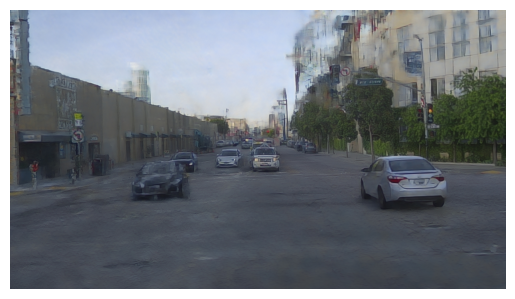

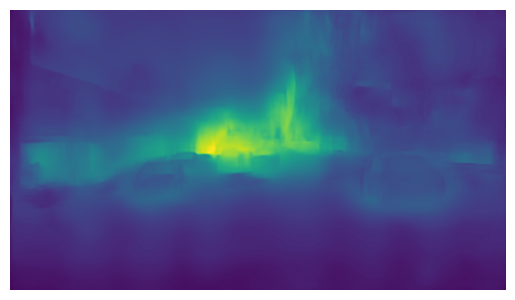

In [55]:
render_8m_img= pl.Path("/home/s0001899/Dev/nerf-thesis/reference/pandaset-01/renders/8m/01.jpg")
img = load_img_if_path(render_8m_img)
depth_img = get_dino_depth(render_8m_img, image_processor, model)
show_img(img)
show_img(depth_img)